# Metodos Numericos
### Ingenieria en Sistemas Computacionales

### Docente: MM. Jorger Pool Cel

## Equipo:
### Lourdes Judith Kanxoc Hau
### Adrián Martín Herrera Tuz
### Héctor Armín Ché Dzib

### UNIDAD 2
### 4°A
 

## Método de secante

In [2]:
import numpy as np

def secante_tabla(fx,xa,tolera):
    dx = 4*tolera
    xb = xa + dx
    tramo = dx
    tabla = []
    while (tramo>=tolera):
        fa = fx(xa)
        fb = fx(xb)
        xc = xa - fa*(xb-xa)/(fb-fa)
        tramo = abs(xc-xa)
        
        tabla.append([xa,xb,xc,tramo])
        xb = xa
        xa = xc

    tabla = np.array(tabla)
    return(tabla)

# PROGRAMA ---------------------
# INGRESO
fx = lambda x: x**3 + 4*x**2 - 10

a  = 1
b  = 2
xa = 1.5
tolera = 0.001
tramos = 100

# PROCEDIMIENTO
tabla = secante_tabla(fx,xa,tolera)
n = len(tabla)
raiz = tabla[n-1,2]

# SALIDA
np.set_printoptions(precision=4)
print('[xa ,\t xb , \t xc , \t tramo]')
for i in range(0,n,1):
    print(tabla[i])
print('raiz en: ', raiz)

[xa ,	 xb , 	 xc , 	 tramo]
[1.5    1.504  1.3736 0.1264]
[1.3736 1.5    1.3658 0.0078]
[1.3658e+00 1.3736e+00 1.3652e+00 5.2085e-04]
raiz en:  1.3652321429167764


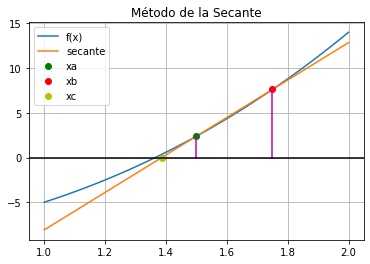

In [3]:
# GRAFICA
import matplotlib.pyplot as plt

# Calcula los puntos a graficar
xi = np.linspace(a,b,tramos+1)
fi = fx(xi)
dx = (b-xa)/2
pendiente = (fx(xa+dx)-fx(xa))/(xa+dx-xa)
b0 = fx(xa) - pendiente*xa
tangentei = pendiente*xi+b0

fxa = fx(xa)
xb = xa + dx
fxb = fx(xb)

plt.plot(xi,fi, label='f(x)')

plt.plot(xi,tangentei, label='secante')
plt.plot(xa,fx(xa),'go', label='xa')
plt.plot(xa+dx,fx(xa+dx),'ro', label='xb')
plt.plot((-b0/pendiente),0,'yo', label='xc')

plt.plot([xa,xa],[0,fxa],'m')
plt.plot([xb,xb],[0,fxb],'m')

plt.axhline(0, color='k')
plt.title('Método de la Secante')
plt.legend()
plt.grid()
plt.show()

# Método de Newton-Raphson

In [4]:
import numpy as np

# INGRESO
fx  = lambda x: x**3 + 4*(x**2) - 10
dfx = lambda x: 3*(x**2) + 8*x

x0 = 2
tolera = 0.001

# PROCEDIMIENTO
tabla = []
tramo = abs(2*tolera)
xi = x0
while (tramo>=tolera):
    xnuevo = xi - fx(xi)/dfx(xi)
    tramo  = abs(xnuevo-xi)
    tabla.append([xi,xnuevo,tramo])
    xi = xnuevo

# convierte la lista a un arreglo.
tabla = np.array(tabla)
n = len(tabla)

# SALIDA
print(['xi', 'xnuevo', 'tramo'])
np.set_printoptions(precision = 4)
print(tabla)
print('raiz en: ', xi)
print('con error de: ',tramo)

['xi', 'xnuevo', 'tramo']
[[2.0000e+00 1.5000e+00 5.0000e-01]
 [1.5000e+00 1.3733e+00 1.2667e-01]
 [1.3733e+00 1.3653e+00 8.0713e-03]
 [1.3653e+00 1.3652e+00 3.2001e-05]]
raiz en:  1.3652300139161466
con error de:  3.200095847999407e-05


# Método de Bisección

In [5]:
import numpy as np

# INGRESO
fx = lambda x: x**3 + 4*x**2 - 10 
a = 1
b = 2
tolera = 0.001

# PROCEDIMIENTO
tabla = []
tramo = b-a

fa = fx(a)
fb = fx(b)
i = 1
while (tramo>tolera):
    c = (a+b)/2
    fc = fx(c)
    tabla.append([i,a,c,b,fa,fc,fb,tramo])
    i = i + 1
                 
    cambia = np.sign(fa)*np.sign(fc)
    if (cambia<0):
        b = c
        fb = fc
    else:
        a=c
        fa = fc
    tramo = b-a
c = (a+b)/2
fc = fx(c)
tabla.append([i,a,c,b,fa,fc,fb,tramo])
tabla = np.array(tabla)

raiz = c

# SALIDA
np.set_printoptions(precision = 4)
print('[ i, a, c, b, f(a), f(c), f(b), tramo]')
# print(tabla)

# Tabla con formato
n=len(tabla)
for i in range(0,n,1):
    unafila = tabla[i]
    formato = '{:.0f}'+' '+(len(unafila)-1)*'{:.3f} '
    unafila = formato.format(*unafila)
    print(unafila)
    
print('raiz: ',raiz)

[ i, a, c, b, f(a), f(c), f(b), tramo]
1 1.000 1.500 2.000 -5.000 2.375 14.000 1.000 
2 1.000 1.250 1.500 -5.000 -1.797 2.375 0.500 
3 1.250 1.375 1.500 -1.797 0.162 2.375 0.250 
4 1.250 1.312 1.375 -1.797 -0.848 0.162 0.125 
5 1.312 1.344 1.375 -0.848 -0.351 0.162 0.062 
6 1.344 1.359 1.375 -0.351 -0.096 0.162 0.031 
7 1.359 1.367 1.375 -0.096 0.032 0.162 0.016 
8 1.359 1.363 1.367 -0.096 -0.032 0.032 0.008 
9 1.363 1.365 1.367 -0.032 0.000 0.032 0.004 
10 1.363 1.364 1.365 -0.032 -0.016 0.000 0.002 
11 1.364 1.365 1.365 -0.016 -0.008 0.000 0.001 
raiz:  1.36474609375


# Método de punto fijo

Ingrese el valor inicial p0: 1.5
Ingrese el error: 0.0001
Ingrese el número de iteraciones50
Iteracion:  1.6509636244473134
Iteracion:  1.6322913532758982
Iteracion:  1.6346240593972983
Iteracion:  1.6343330008665646
El punto fijo es  1.634369322747108 después de  5 iteraciones


<function matplotlib.pyplot.show(close=None, block=None)>

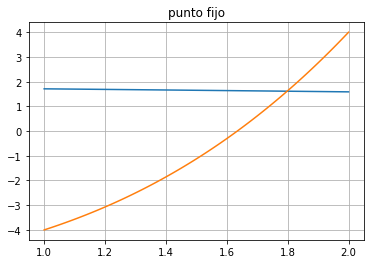

In [8]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**3 + x - 6

def g(x):
    return (6-x)**(1/3)

p0=float(input("Ingrese el valor inicial p0: "))
tol=float(input("Ingrese el error: "))
N=int(input("Ingrese el número de iteraciones"))
i=1
while i<N:
    p=g(p0)
    if abs(p-p0)<tol:
        print("El punto fijo es ",p,"después de ",i, "iteraciones")
        break
    i=i+1
    p0=p
    print('Iteracion: ', p0)
    if i>N:
        print("El método no converge")
        
x=np.linspace(1,2,101)    
plt.plot (x, g(x))
plt.plot (x, f(x))
plt.title ('punto fijo')
plt.grid()
plt.show